> ## Data Analyst

In [354]:
import pandas as  pd 

import numpy as np
import matplotlib as plt
import seaborn as sns

In [355]:
meta = pd.read_csv(r'D:\Backpropagation\Project_Backpropagation\Iris.csv')
meta

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [356]:
class Analyst_data:
    def __init__(self, data):
        self.data = data
    def show_columns(self):
        # How many columns in data ?
        print(f' Quality of the columns: {len(self.data.columns())}') 
        for col in self.data.columns:
            print(col)
    def check_type(self):
        print("\n##### CHECK TYPES ##### \n")
        print(self.data.dtypes)
    def check_null(self):
        print("\n##### CHECK NULL ##### \n")
        print(self.data.isna().sum())
    def check_describe(self):
        print("\n##### CHECK describe ##### \n")
        print(self.data.describe())
    def check_outliner(self):
        # sns.boxplot(data=self.data[self.data.describe().columns])
        df = self.data.describe()
        print("\n##### CHECK outliner ##### \n")
        for col in  df.columns:
            IQR = df[col]['75%'] - df[col]['25%']
            sl = len(self.data[col][(self.data[col] < df[col]['25%'] - 1.5*IQR) & (self.data[col] > df[col]['75%'] + 1.5*IQR)])
            print(f'{col} has {sl}\n')
    def show(self):
        self.check_type()
        self.check_null()
        self.check_describe()
        self.check_outliner()

In [357]:
ad = Analyst_data(meta)
ad.show()



##### CHECK TYPES ##### 

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

##### CHECK NULL ##### 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

##### CHECK describe ##### 

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000 

## Where is Sepal and Petal place in flower ? 

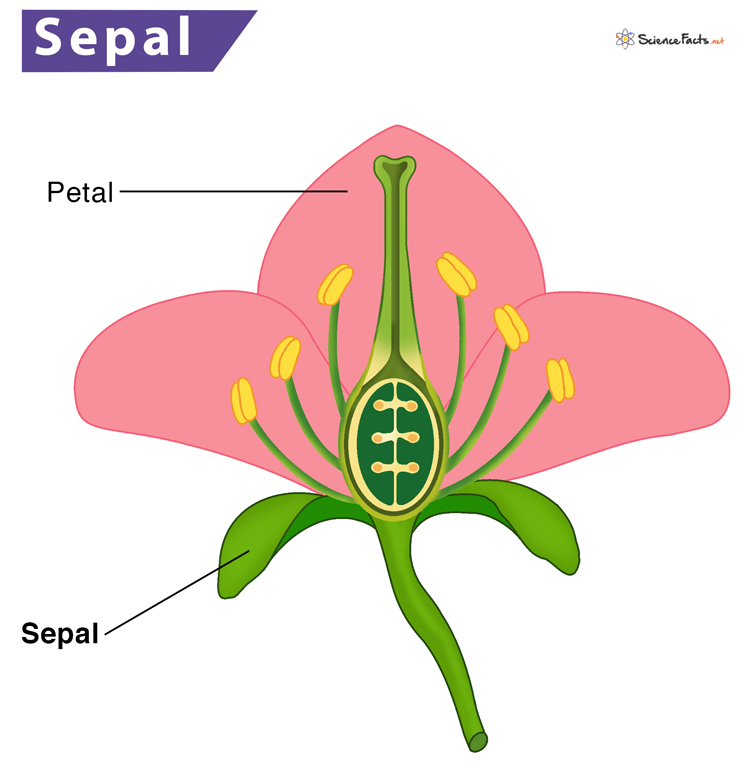

In [358]:
from IPython.display import Image
image_path = r'D:\Backpropagation\Project_Backpropagation\Sepals.jpg'
Image(filename=image_path, width=300, height=200)

In [359]:
meta.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Describes Data
+ This dataset include 3-types flower: Iris-setosa , Iris-versicolor, Iris-virginica.
+ Per kind of flower has quality 50.
+ Dataset describes size petal and sepal of flower

array([[<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>],
       [<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>]], dtype=object)

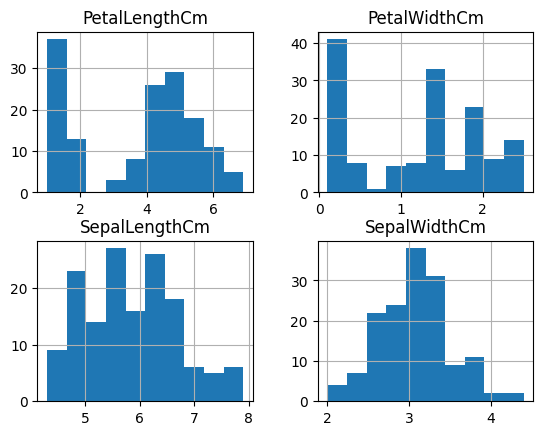

In [360]:
meta[meta.columns.difference(['Id'])].hist()

> ### Univariate analysis

- Univariate analysis is perharps the simplest form of statistical analysis. The key fact is that only one variable is involved

In [361]:
meta.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [362]:
setosa = meta[meta.Species == 'Iris-setosa']
versicolor = meta[meta.Species == 'Iris-versicolor']
virginica = meta[meta.Species == 'Iris-virginica']

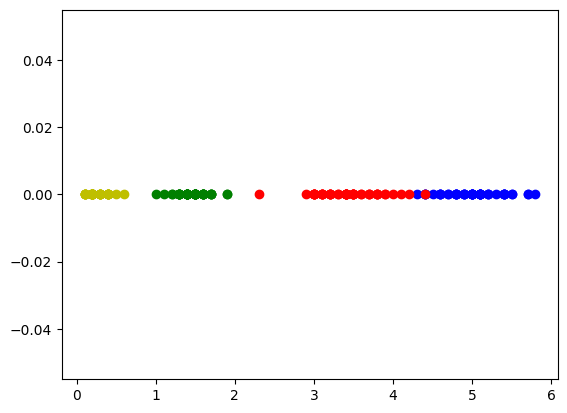

In [363]:
import matplotlib.pyplot as plt
plt.plot(setosa.SepalLengthCm, np.zeros_like(setosa.SepalLengthCm), 'bo')
plt.plot(setosa.SepalWidthCm, np.zeros_like(setosa.SepalWidthCm), 'ro')
plt.plot(setosa.PetalLengthCm, np.zeros_like(setosa.PetalLengthCm), 'go')
plt.plot(setosa.PetalWidthCm, np.zeros_like(setosa.PetalWidthCm), 'yo')

- So, the graph has overlappings. So, univariate analysis will be not much helpful for distinguishing the species properly

> ### Bivariate Analysis 

Bivariate analysis is the simultaneous analysis of two variable. It explores the concept of relationship between two variable. or whether there are differences between two variable and significance of these different

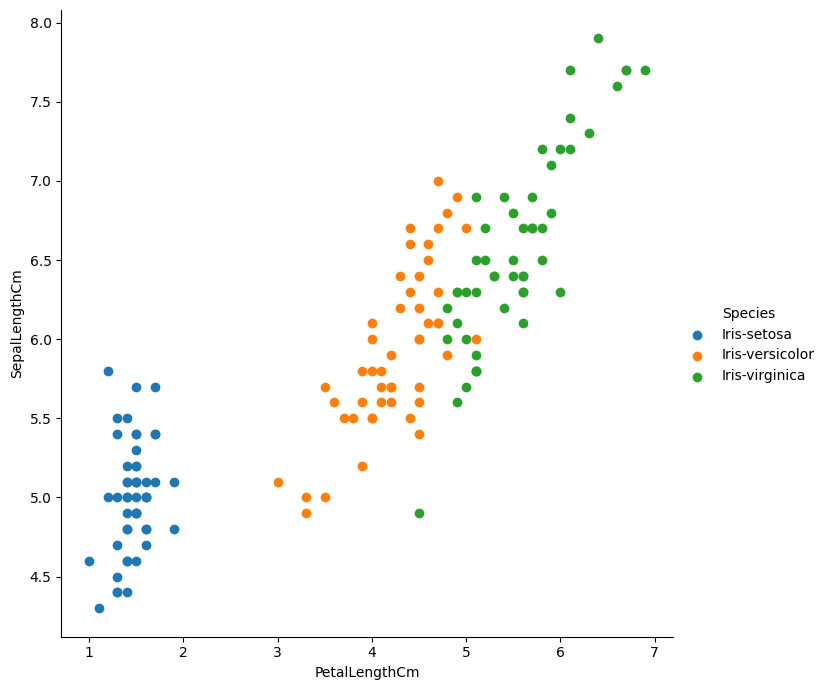

In [364]:
sns.FacetGrid(meta, hue='Species', height=7).map(plt.scatter, 'PetalLengthCm', 'SepalLengthCm').add_legend()
plt.show()

> ### Multivariate analysis

c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


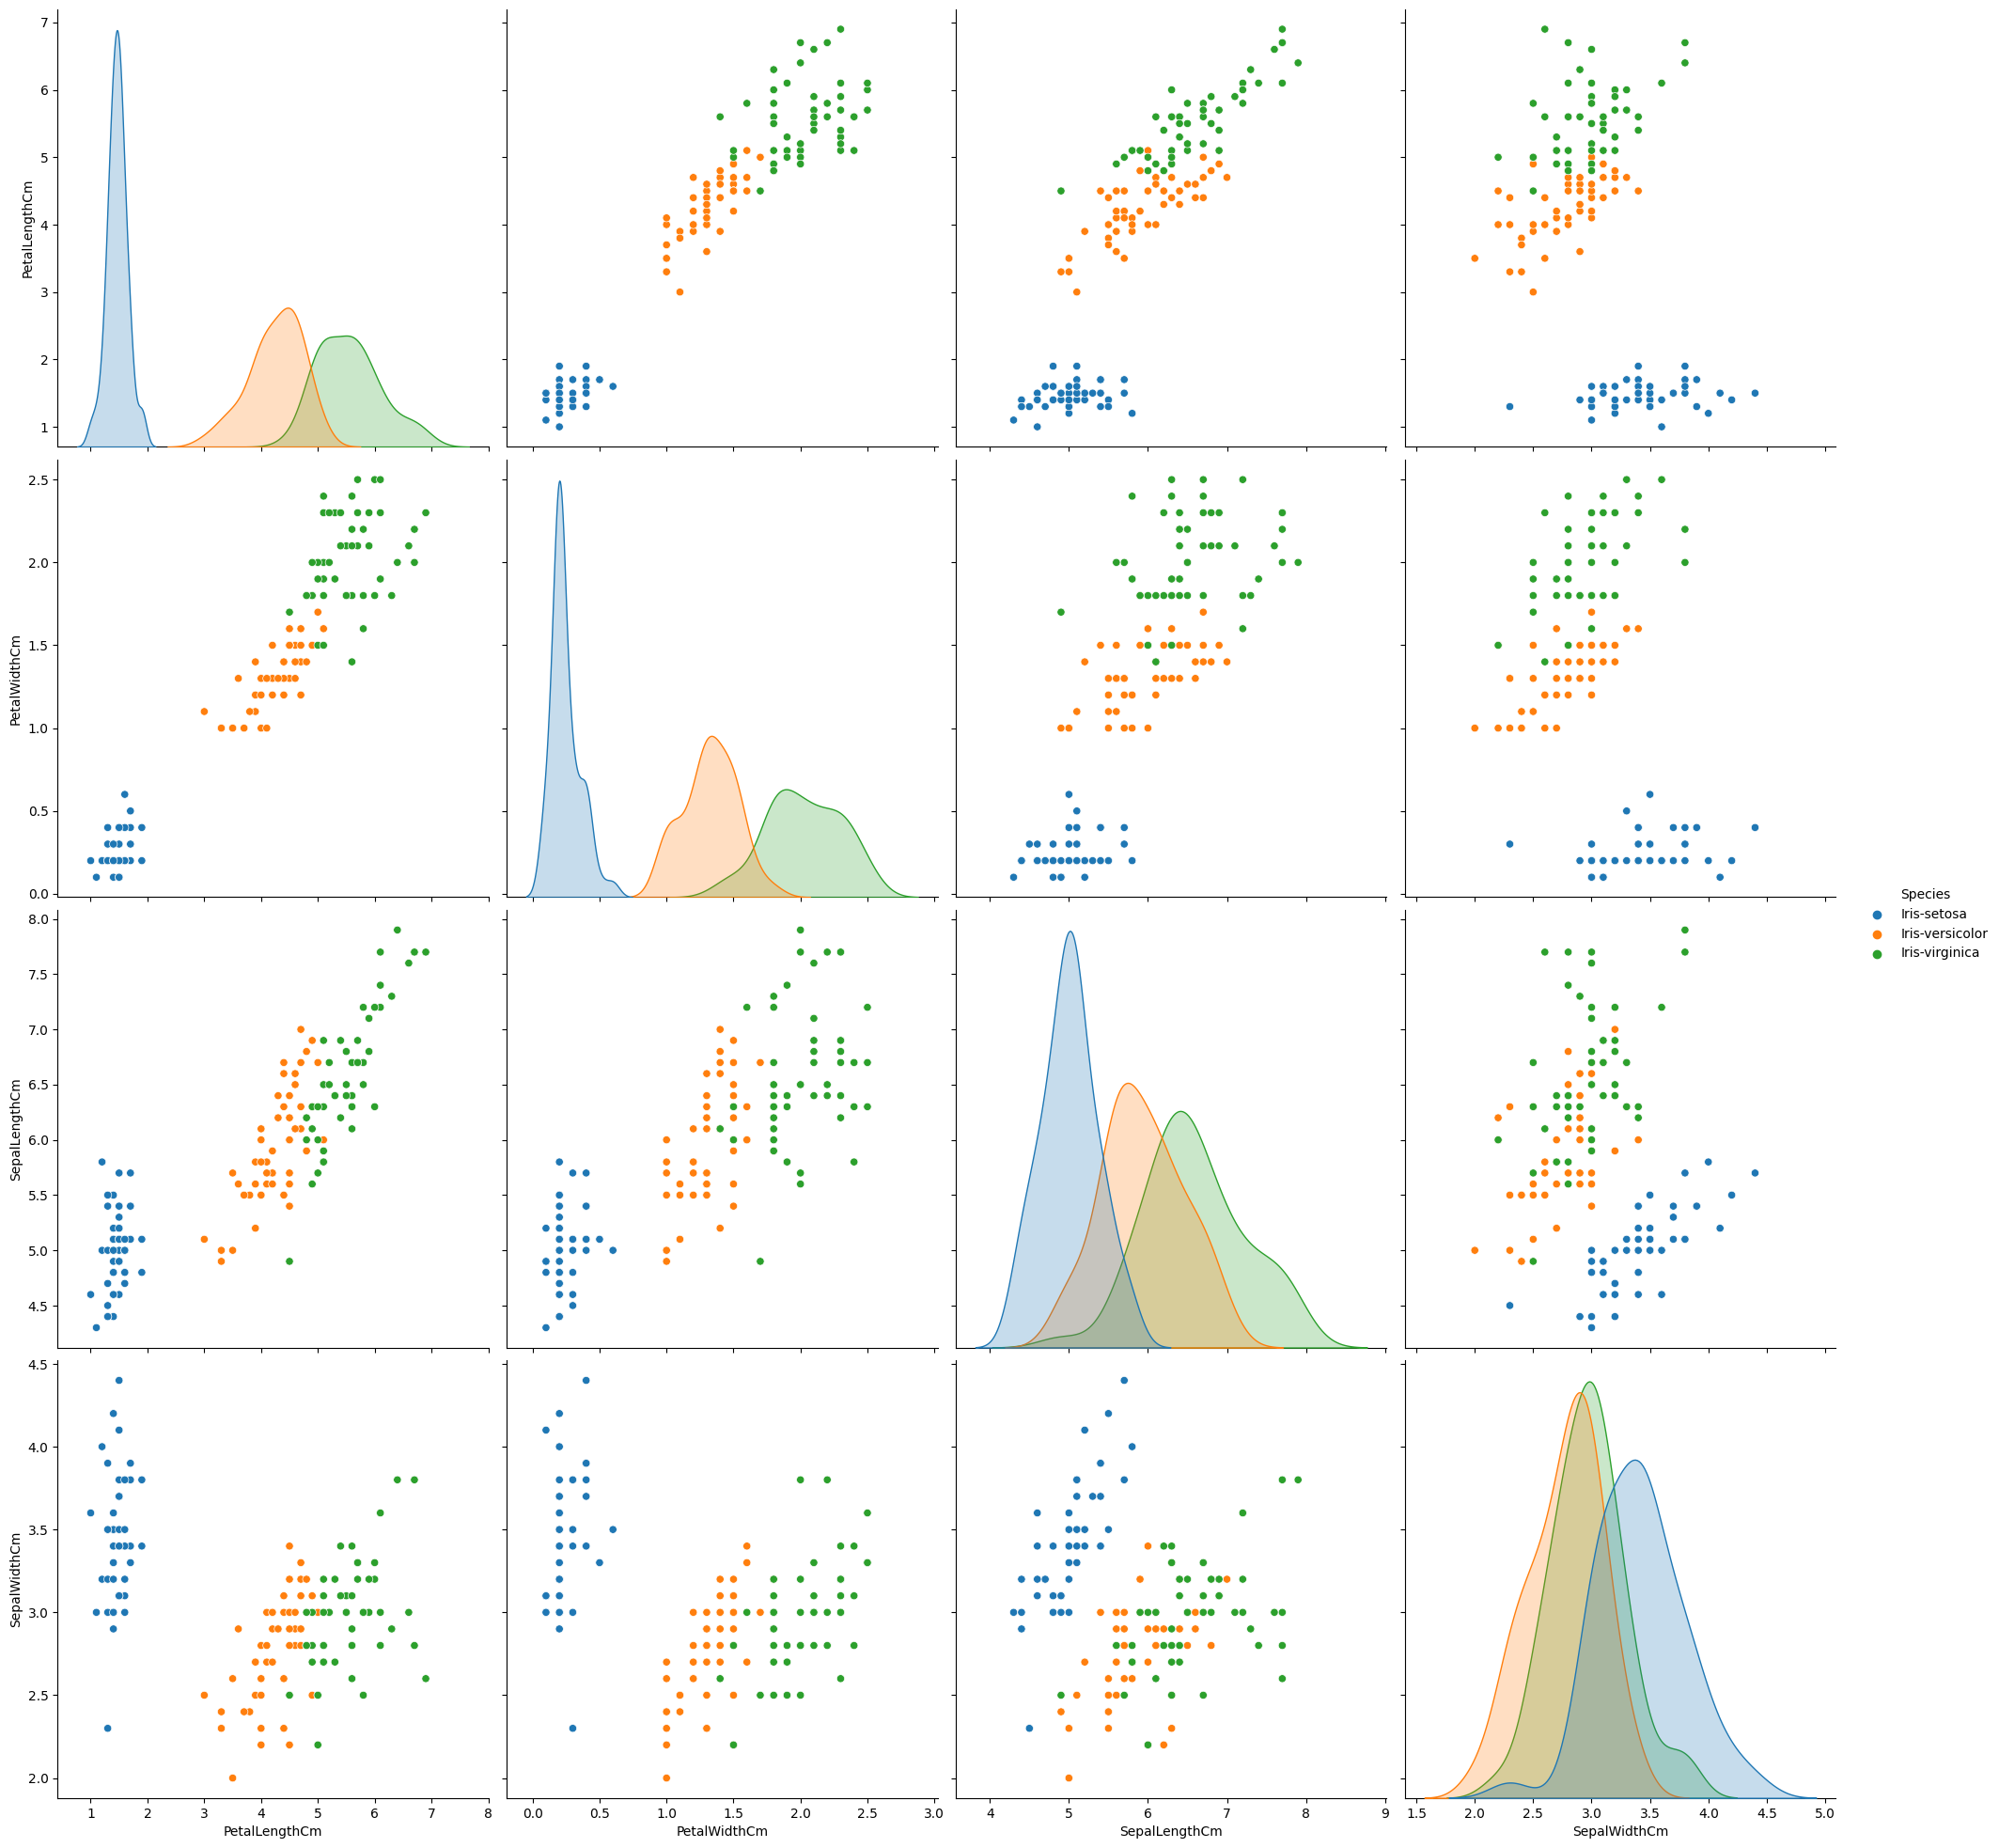

In [365]:
sns.pairplot(meta[meta.columns.difference(['Id'])], hue='Species', size=5)


- This plot, SepalLenghthcm and SepalWidthCm has level distingush lowest

> ### Split DataSet

In [366]:
from sklearn.model_selection import train_test_split
import random

In [367]:
from sklearn.datasets import load_iris

iris_data = load_iris()

In [368]:
random.seed(123)

def separate_data():
    A = iris_dataset[0:40]
    tA = iris_dataset[40:50]
    B = iris_dataset[50:90]
    tB = iris_dataset[90:100]
    C = iris_dataset[100:140]
    tC = iris_dataset[140:150]
    train = np.concatenate((A,B,C))
    test =  np.concatenate((tA,tB,tC))
    return train,test

train_porcent = 80 # Porcent Training 
test_porcent = 20 # Porcent Test
iris_dataset = np.column_stack((iris_data.data,iris_data.target.T)) #Join X and Y
iris_dataset = list(iris_dataset)
random.shuffle(iris_dataset)

Filetrain, Filetest = separate_data()

trainx = np.array([i[:4] for i in Filetrain])
trainy = np.array([i[4] for i in Filetrain])+1
valx = np.array([i[:4] for i in Filetest])
valy = np.array([i[4] for i in Filetest])+1

In [369]:
class MutilayerPerceptron:
    classifical_flower = {
        1: ['Iris-setosa', np.array([1,0,0])],
        2: ['Iris-versicolor', np.array([0,1,0])],
        3: ['Iris-virginica', np.array([0,0,1])]
    }
    def __init__(self, params = None):
        self.best_weight = 0
        self.output = None
        self.output_layer1 = None
        self.output_layer2 = None
        if params ==None:
            self.inputLayer = 4
            self.hiddenLayer = 5
            self.outputLayer = 3
            self.learningRate = 0.0001
            self.max_epochs = 600
            self.BiasHiddenValue = -1
            self.BiasOutputValue = -1
        else:
            'InputLayer, HiddenLayer, OutputLayer, LearningRate, max_epochs, BiasHiddenValue, BiasOutputValue'
            self.inputLayer = params['InputLayer']
            self.hiddenLayer = params['HiddenLayer']
            self.outputLayer = params['OutputLayer']
            self.learningRate = params['LearningRate']
            self.max_epochs = params['max_epochs']
            self.BiasHiddenValue = params['BiasHiddenValue']
            self.BiasOutputValue = params['BiasOutputValue']
        'init weight and bias'
        self.weight_hidden = np.array([[random.uniform(-1, 1) for x in range(self.hiddenLayer)] for i in range(self.inputLayer)])
        self.weight_output = np.array([[random.uniform(-1, 1) for x in range(self.outputLayer)] for i in range(self.hiddenLayer)])

        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.outputLayer)])
        self.classes_number = 3 
    def softmax(self, Z):
        e_Z = np.exp(Z -np.max(Z, axis=0, keepdims=True))
        return e_Z /e_Z.sum(axis=0)
    def cost(self, Y, Y_hat):
        return - np.sum(Y*np.log(Y_hat))/len(Y)
    def predict(self, X, y = None):
        output_layer1 = X@ self.weight_hidden +  self.BIAS_hidden
        A1 = np.maximum(0, output_layer1)
        output_layer2 = A1 @ self.weight_output  + self.BIAS_output
        y_hat = self.softmax(output_layer2)
        y_hat = np.argmax(y_hat.T, axis=0) +1
        acc = np.mean(y_hat == y)*100
        return acc
    def fit(self, X, y, xval, yval):
        count_epoch = 1
        parame = []
        best_acc = 0
        list_loss_train = []
        list_loss_val = []
        list_train_acc = []
        list_val_acc = []
        while count_epoch <= self.max_epochs:
            total_loss = 0
            for idx, inputs in enumerate(X):
                
                'Stage 1: Forward Propagation'
                self.output_layer1 = inputs@ self.weight_hidden +  self.BIAS_hidden
                A1 = np.maximum(0, self.output_layer1)
                self.output_layer2 = A1 @ self.weight_output  + self.BIAS_output
                y_hat = self.softmax(self.output_layer2)
                self.output = self.classifical_flower[y[idx]][1]
                
                'Caculation Loss'
                total_loss += self.cost(self.output , y_hat)
                
                'Stage 2: Backpropagation'
                E_layer2 = (1/len(inputs)) * (y_hat - self.output)

                dw2 = A1.reshape(-1, 1) @ E_layer2.reshape(1, -1)
                
                db2 = np.sum(E_layer2, axis=0)
                
                E_layer1 = self.weight_output@E_layer2
                E_layer1[self.output_layer1<=0] = 0 
                dw1 = inputs.reshape(-1, 1) @E_layer1.reshape(1, -1)
                db1 = np.sum(E_layer1, axis=0)
                
                'Update gradient descen'
                self.weight_hidden -=  self.learningRate*dw1
                self.BIAS_hidden = self.BIAS_hidden.astype(np.float64)
                self.BIAS_hidden -=  self.learningRate*db1
                self.weight_output -= self.learningRate*dw2
                self.BIAS_output = self.BIAS_output.astype(np.float64)
                self.BIAS_output -= self.learningRate*db2
            train_acc = self.predict(X, y)
            val_acc = self.predict(xval,yval)
            loss_train = total_loss/X.shape[1]
            
            'Compute loss val'
            total_loss = 0
            for idx, inputs in enumerate(xval):
                
                'Stage 1: Forward Propagation'
                self.output_layer1 = inputs@ self.weight_hidden +  self.BIAS_hidden
                A1 = np.maximum(0, self.output_layer1)
                self.output_layer2 = A1 @ self.weight_output  + self.BIAS_output
                y_hat = self.softmax(self.output_layer2)
                self.output = self.classifical_flower[yval[idx]][1]
                
                'Caculation Loss'
                total_loss += self.cost(self.output , y_hat)
            loss_val = total_loss/xval.shape[1]
            
            print(f'Epoch {count_epoch} : Loss train {loss_train}: Train ACC = {train_acc}: Val ACC = {val_acc}\n')   
            
            # parame.append([self.weight_hidden, self.BIAS_hidden, self.weight_output, self.BIAS_output])   
            count_epoch+=1
            list_loss_train.append(loss_train)
            list_loss_val.append(loss_val)
            list_train_acc.append(train_acc)
            list_val_acc.append(val_acc)
            if val_acc > best_acc:
                best_acc = val_acc
                self.best_weight = [self.weight_hidden, self.weight_output]
        plt.plot(list(range(1, self.max_epochs+1)), list_loss_train, label='Loss Train')
        plt.plot(list(range(1, self.max_epochs+1)), list_loss_val, label='Loss Val')
        plt.plot(list(range(1, self.max_epochs+1)), list_train_acc, label='ACC Train')
        plt.plot(list(range(1, self.max_epochs+1)), list_val_acc, label='ACC Val')
        plt.title('Parameter')
        plt.legend()
            

Epoch 1 : Loss train 82.26415325049085: Train ACC = 7.5: Val ACC = 3.3333333333333335

Epoch 2 : Loss train 76.3356456988446: Train ACC = 7.5: Val ACC = 3.3333333333333335

Epoch 3 : Loss train 70.62574981585817: Train ACC = 7.5: Val ACC = 3.3333333333333335

Epoch 4 : Loss train 65.18385632208508: Train ACC = 7.5: Val ACC = 3.3333333333333335

Epoch 5 : Loss train 60.08755684781459: Train ACC = 6.666666666666667: Val ACC = 3.3333333333333335

Epoch 6 : Loss train 55.43522415810065: Train ACC = 6.666666666666667: Val ACC = 6.666666666666667

Epoch 7 : Loss train 51.31752775142616: Train ACC = 6.666666666666667: Val ACC = 6.666666666666667

Epoch 8 : Loss train 47.77591450773298: Train ACC = 6.666666666666667: Val ACC = 6.666666666666667

Epoch 9 : Loss train 44.778129016635944: Train ACC = 7.5: Val ACC = 6.666666666666667

Epoch 10 : Loss train 42.232455936192565: Train ACC = 7.5: Val ACC = 6.666666666666667

Epoch 11 : Loss train 40.02615054536678: Train ACC = 8.333333333333332: Val A

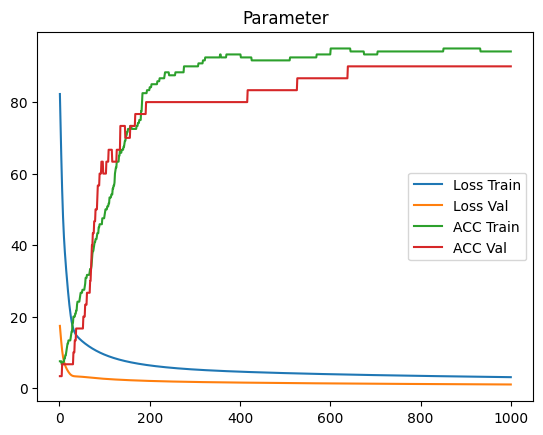

In [370]:
models = MutilayerPerceptron({'InputLayer': 4, 'HiddenLayer':5, 'OutputLayer': 3, 'max_epochs': 1000, 'BiasHiddenValue':5, 'BiasOutputValue': 3, 'LearningRate':0.0001})
models.fit(np.array(trainx), np.array(trainy), valx, valy)

## Evaluation Confusion matrix, AUC

c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:1015: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Accuracy: 0.90
Precision: 0.93
Recall: 0.90
F1 score: 0.90
AUC score : 0.90


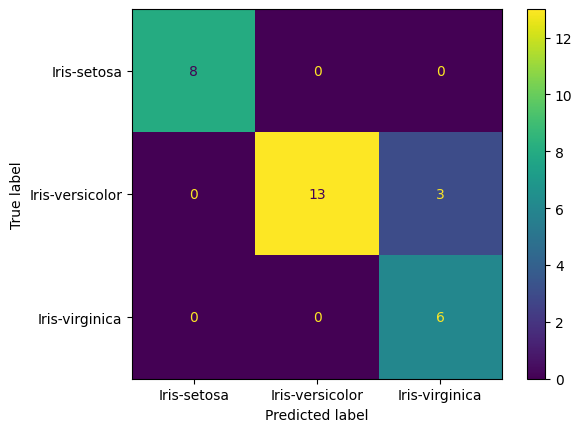

In [385]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc

y_true = []
y_pred = []
for idx, inputs in enumerate(valx):
    'Stage 1: Forward Propagation'
    output_layer1 = inputs@ models.weight_hidden +  models.BIAS_hidden
    A1 = np.maximum(0, output_layer1)
    output_layer2 = A1 @ models.weight_output  + models.BIAS_output
    y_hat = models.softmax(output_layer2)
    y_hat = np.argmax(y_hat.T, axis=0) 
    y_true += [valy[idx] -1]
    y_pred += [y_hat]    
# # Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=3)
auc_score = auc(fpr, tpr)
# roc_auc_score = roc_auc_score(y_true, y_pred, average='weighted')
# # Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 score: {f1:.2f}')
print(f'AUC score : {f1:.2f}')
# target_names = ['nocancer', 'cancer']
cm = confusion_matrix(y_true, y_pred)
cr = classification_report(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Iris-setosa','Iris-versicolor','Iris-virginica'])
disp.plot()
plt.savefig('confusion_matrix_DDSM.png')
plt.show()

In [379]:
y_pred

[0,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 0,
 0,
 2,
 2,
 0,
 1,
 0]